# Regression for 3 questions - Gender


In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('finaldata_clusters_regions_Added.csv').drop(columns = ['Unnamed: 0'])

In [3]:
data.head()

,STATE,Year,cluster,CO2,CH4,N2O,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone,Question,DataValue,StratificationCategory1,Stratification1,Population,Total Sq. Mi.,Total Sq. Km.,REGION,Region_Name
0,AL,2012,1,84138381,701702,602778,264437,3,7,4,0.044215,Mortality from diseases of the heart,234.8,Gender,Female,4815588.0,"52,420","135,767",3,South Region
1,AL,2012,1,84138381,701702,602778,264437,3,7,4,0.044215,Asthma mortality rate,14.9,Gender,Female,4815588.0,"52,420","135,767",3,South Region
2,AL,2012,1,84138381,701702,602778,264437,3,7,4,0.044215,Asthma mortality rate,8.6,Gender,Male,4815588.0,"52,420","135,767",3,South Region
3,AL,2012,1,84138381,701702,602778,264437,3,7,4,0.044215,Asthma mortality rate,8.9,Race/Ethnicity,"White, non-Hispanic",4815588.0,"52,420","135,767",3,South Region
4,AL,2012,1,84138381,701702,602778,264437,3,7,4,0.044215,Asthma mortality rate,21.8,Race/Ethnicity,"Black, non-Hispanic",4815588.0,"52,420","135,767",3,South Region


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23256 entries, 0 to 23255
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   STATE                       23256 non-null  object 
 1   Year                        23256 non-null  int64  
 2   cluster                     23256 non-null  int64  
 3   CO2                         23256 non-null  int64  
 4   CH4                         23256 non-null  int64  
 5   N2O                         23256 non-null  int64  
 6   Fluorinated GHG             23256 non-null  int64  
 7   Laws and Regulations        23256 non-null  int64  
 8   State Incentives            23256 non-null  int64  
 9   Utility/Private Incentives  23256 non-null  int64  
 10  Ozone                       23256 non-null  float64
 11  Question                    23200 non-null  object 
 12  DataValue                   17433 non-null  float64
 13  StratificationCategory1     232

In [5]:
data['Total Sq. Mi.']=data['Total Sq. Mi.'].str.replace(',','')

In [6]:
data['Total Sq. Mi.'] = data['Total Sq. Mi.'].astype('int64') 

In [7]:
data['CO2_PER_POP'] = data['CO2'] / data['Population']
data['CO2_PER_SQUARE'] = data['CO2'] / data['Total Sq. Mi.']
data['CH4_PER_POP'] = data['CH4'] / data['Population']
data['CH4_PER_SQUARE'] = data['CH4'] / data['Total Sq. Mi.']
data['N2O_PER_POP'] = data['N2O'] / data['Population']
data['N2O_PER_SQUARE'] = data['N2O'] / data['Total Sq. Mi.']
data['Fluorinated GHG_PER_POP'] = data['Fluorinated GHG'] / data['Population']
data['Fluorinated GHG_PER_SQUARE'] = data['Fluorinated GHG'] / data['Total Sq. Mi.']

In [8]:
data.drop(['STATE', 'Year','CO2','CH4','N2O','Fluorinated GHG_PER_POP','Population','Total Sq. Mi.','Total Sq. Km.'], axis=1, inplace=True)

"Asthma mortality rate", "Mortality from diseases of the heart", "Invasive cancer (all sites combined), incidence"


In [9]:
data = data[~data['StratificationCategory1'].isnull()]



In [10]:
data['Question'].unique()

array(['Mortality from diseases of the heart', 'Asthma mortality rate',
       'Mortality from heart failure',
       'Mortality with chronic obstructive pulmonary disease as underlying cause among adults aged >= 45 years',
       'Mortality with chronic obstructive pulmonary disease as underlying or contributing cause among adults aged >= 45 years',
       'Mortality from coronary heart disease',
       'Premature mortality among adults aged 45-64 years',
       'Mortality from total cardiovascular diseases',
       'Invasive cancer (all sites combined), incidence',
       'Cancer of the lung and bronchus, incidence'], dtype=object)

In [11]:
data['StratificationCategory1'].unique()

array(['Gender', 'Race/Ethnicity', 'Overall'], dtype=object)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23200 entries, 0 to 23254
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cluster                     23200 non-null  int64  
 1   Fluorinated GHG             23200 non-null  int64  
 2   Laws and Regulations        23200 non-null  int64  
 3   State Incentives            23200 non-null  int64  
 4   Utility/Private Incentives  23200 non-null  int64  
 5   Ozone                       23200 non-null  float64
 6   Question                    23200 non-null  object 
 7   DataValue                   17433 non-null  float64
 8   StratificationCategory1     23200 non-null  object 
 9   Stratification1             23200 non-null  object 
 10  REGION                      23200 non-null  int64  
 11  Region_Name                 23200 non-null  object 
 12  CO2_PER_POP                 23200 non-null  float64
 13  CO2_PER_SQUARE              232

In [13]:
data.isnull().sum()

cluster                          0
Fluorinated GHG                  0
Laws and Regulations             0
State Incentives                 0
Utility/Private Incentives       0
Ozone                            0
Question                         0
DataValue                     5767
StratificationCategory1          0
Stratification1                  0
REGION                           0
Region_Name                      0
CO2_PER_POP                      0
CO2_PER_SQUARE                   0
CH4_PER_POP                      0
CH4_PER_SQUARE                   0
N2O_PER_POP                      0
N2O_PER_SQUARE                   0
Fluorinated GHG_PER_SQUARE       0
dtype: int64

In [14]:
data.shape

(23200, 19)

Question1 :"Asthma mortality rate"

In [15]:
data_q1 = data[data['Question']=='Asthma mortality rate']

In [16]:
data_q1.isnull().sum()

cluster                          0
Fluorinated GHG                  0
Laws and Regulations             0
State Incentives                 0
Utility/Private Incentives       0
Ozone                            0
Question                         0
DataValue                     1778
StratificationCategory1          0
Stratification1                  0
REGION                           0
Region_Name                      0
CO2_PER_POP                      0
CO2_PER_SQUARE                   0
CH4_PER_POP                      0
CH4_PER_SQUARE                   0
N2O_PER_POP                      0
N2O_PER_SQUARE                   0
Fluorinated GHG_PER_SQUARE       0
dtype: int64

In [17]:
data_q1[data_q1['StratificationCategory1']=='Race/Ethnicity'].isnull().sum()

cluster                          0
Fluorinated GHG                  0
Laws and Regulations             0
State Incentives                 0
Utility/Private Incentives       0
Ozone                            0
Question                         0
DataValue                     1333
StratificationCategory1          0
Stratification1                  0
REGION                           0
Region_Name                      0
CO2_PER_POP                      0
CO2_PER_SQUARE                   0
CH4_PER_POP                      0
CH4_PER_SQUARE                   0
N2O_PER_POP                      0
N2O_PER_SQUARE                   0
Fluorinated GHG_PER_SQUARE       0
dtype: int64

In [18]:
data_q1[data_q1['StratificationCategory1']=='Gender'].isnull().sum()

cluster                         0
Fluorinated GHG                 0
Laws and Regulations            0
State Incentives                0
Utility/Private Incentives      0
Ozone                           0
Question                        0
DataValue                     337
StratificationCategory1         0
Stratification1                 0
REGION                          0
Region_Name                     0
CO2_PER_POP                     0
CO2_PER_SQUARE                  0
CH4_PER_POP                     0
CH4_PER_SQUARE                  0
N2O_PER_POP                     0
N2O_PER_SQUARE                  0
Fluorinated GHG_PER_SQUARE      0
dtype: int64

In [19]:
data_q1_2 = data_q1[data_q1['StratificationCategory1']=='Gender']
data_q1_2.drop(['Question','StratificationCategory1'], axis=1, inplace=True)

/opt/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
data_q1_2.head()

,cluster,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone,DataValue,Stratification1,REGION,Region_Name,CO2_PER_POP,CO2_PER_SQUARE,CH4_PER_POP,CH4_PER_SQUARE,N2O_PER_POP,N2O_PER_SQUARE,Fluorinated GHG_PER_SQUARE
1,1,264437,3,7,4,0.044215,14.9,Female,3,South Region,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582
2,1,264437,3,7,4,0.044215,8.6,Male,3,South Region,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582
86,1,274194,3,7,4,0.039733,10.9,Female,3,South Region,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713
87,1,274194,3,7,4,0.039733,NaN,Male,3,South Region,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713
158,1,312201,3,7,4,0.040936,9.4,Male,3,South Region,17.523932,1618.606543,0.130945,12.094792,0.108513,10.022873,5.955761


In [21]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_q1_2['Stratification1'] = label_encoder.fit_transform(data_q1_2['Stratification1'])
data_q1_2.rename(columns={'Stratification1':'Male'}, inplace=True)

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
data_q1_2.drop(['cluster', 'REGION','Region_Name'], axis=1, inplace=True)

/opt/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
data_q1_2.isnull().sum()

Fluorinated GHG                 0
Laws and Regulations            0
State Incentives                0
Utility/Private Incentives      0
Ozone                           0
DataValue                     337
Male                            0
CO2_PER_POP                     0
CO2_PER_SQUARE                  0
CH4_PER_POP                     0
CH4_PER_SQUARE                  0
N2O_PER_POP                     0
N2O_PER_SQUARE                  0
Fluorinated GHG_PER_SQUARE      0
dtype: int64

In [24]:
data_q1_2 = data_q1_2.dropna(subset=['DataValue'])

In [25]:
cols = data_q1_2.columns.tolist()
cols = cols[5:] + cols[:5]
data_q1_2 = data_q1_2[cols]

In [26]:
data_q1_2.head()

,DataValue,Male,CO2_PER_POP,CO2_PER_SQUARE,CH4_PER_POP,CH4_PER_SQUARE,N2O_PER_POP,N2O_PER_SQUARE,Fluorinated GHG_PER_SQUARE,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone
1,14.9,0,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215
2,8.6,1,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215
86,10.9,0,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733
158,9.4,1,17.523932,1618.606543,0.130945,12.094792,0.108513,10.022873,5.955761,312201,3,7,4,0.040936
159,14.0,0,17.523932,1618.606543,0.130945,12.094792,0.108513,10.022873,5.955761,312201,3,7,4,0.040936


In [27]:
data_q1_2.shape

(335, 14)

In [28]:
X = pd.DataFrame(data_q1_2.loc[:,'Male':])
y = pd.DataFrame(data_q1_2['DataValue'])

In [29]:
y.head()

,DataValue
1,14.9
2,8.6
86,10.9
158,9.4
159,14.0


Linear regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

nmc = 100

#Linear Regression
linreg = LinearRegression()
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
CVInfo = cross_validate(linreg, X, y, cv=cvf,return_train_score=True)
print('---- linear regression ----')
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

---- linear regression ----
0.5308996461833474
0.48048432293341703


In [31]:

#Random Forest

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#  Note:  no need for scaling, back to simple parameters
# set up dictionary for grid search
param_grid={'max_features':[7],'max_depth':[25],'n_estimators':[50]}
# set up cross-validation shuffles
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
# set up search
grid_search=GridSearchCV(RandomForestRegressor(random_state=25),param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)

print('---- random forest ----')
print(results[['rank_test_score','mean_test_score','param_max_features','param_max_depth']])
print('---- optimal parameters ----')
print(grid_search.best_params_)
print('---- best accuracy ----')
print(grid_search.best_score_)

/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector 

/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector 

/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector 

/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector 

---- random forest ----
   rank_test_score  mean_test_score param_max_features param_max_depth
0                1         0.637704                  7              25
---- optimal parameters ----
{'max_depth': 25, 'max_features': 7, 'n_estimators': 50}
---- best accuracy ----
0.6377039206347305


Gradient Boosting Regression

In [32]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

/opt/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy on training set: 0.920
Accuracy on test set: 0.610


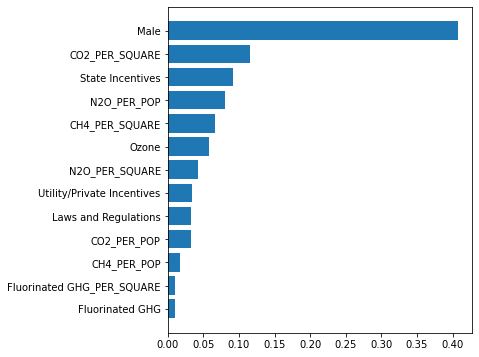

In [33]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data_q1_2.iloc[:,1:].columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
plt.show()

Mortality from diseases of the heart

In [34]:
data_q1 = data[data['Question']=='Mortality from diseases of the heart']

data_q1.isnull().sum()

data_q1[data_q1['StratificationCategory1']=='Gender'].isnull().sum()





cluster                       0
Fluorinated GHG               0
Laws and Regulations          0
State Incentives              0
Utility/Private Incentives    0
Ozone                         0
Question                      0
DataValue                     0
StratificationCategory1       0
Stratification1               0
REGION                        0
Region_Name                   0
CO2_PER_POP                   0
CO2_PER_SQUARE                0
CH4_PER_POP                   0
CH4_PER_SQUARE                0
N2O_PER_POP                   0
N2O_PER_SQUARE                0
Fluorinated GHG_PER_SQUARE    0
dtype: int64

In [35]:
data_q1_2 = data_q1[data_q1['StratificationCategory1']=='Gender']
data_q1_2.drop(['Question','StratificationCategory1'], axis=1, inplace=True)

data_q1_2.head()



/opt/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,cluster,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone,DataValue,Stratification1,REGION,Region_Name,CO2_PER_POP,CO2_PER_SQUARE,CH4_PER_POP,CH4_PER_SQUARE,N2O_PER_POP,N2O_PER_SQUARE,Fluorinated GHG_PER_SQUARE
0,1,264437,3,7,4,0.044215,234.8,Female,3,South Region,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582
26,1,264437,3,7,4,0.044215,265.3,Male,3,South Region,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582
108,1,274194,3,7,4,0.039733,279.8,Male,3,South Region,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713
135,1,274194,3,7,4,0.039733,237.5,Female,3,South Region,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713
193,1,312201,3,7,4,0.040936,275.0,Male,3,South Region,17.523932,1618.606543,0.130945,12.094792,0.108513,10.022873,5.955761


In [36]:
data_q1_2.shape


(672, 17)

In [37]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_q1_2['Stratification1'] = label_encoder.fit_transform(data_q1_2['Stratification1'])
data_q1_2.rename(columns={'Stratification1':'Male'}, inplace=True)

data_q1_2.drop(['cluster', 'REGION','Region_Name'], axis=1, inplace=True)



/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [38]:

data_q1_2.isnull().sum()

data_q1_2 = data_q1_2.dropna(subset=['DataValue'])

cols = data_q1_2.columns.tolist()
cols = cols[5:] + cols[:5]
data_q1_2 = data_q1_2[cols]



In [39]:


X = pd.DataFrame(data_q1_2.loc[:,'Male':])
y = pd.DataFrame(data_q1_2['DataValue'])

y.head()


,DataValue
0,234.8
26,265.3
108,279.8
135,237.5
193,275.0


Linear regression

In [40]:


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

nmc = 100

#Linear Regression
linreg = LinearRegression()
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
CVInfo = cross_validate(linreg, X, y, cv=cvf,return_train_score=True)
print('---- linear regression ----')
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))





---- linear regression ----
0.5320338083878032
0.5011603915270283


Random Forest Regression

In [41]:



#Random Forest

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#  Note:  no need for scaling, back to simple parameters
# set up dictionary for grid search
param_grid={'max_features':[7],'max_depth':[25],'n_estimators':[50]}
# set up cross-validation shuffles
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
# set up search
grid_search=GridSearchCV(RandomForestRegressor(random_state=25),param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)

print('---- random forest ----')
print(results[['rank_test_score','mean_test_score','param_max_features','param_max_depth']])
print('---- optimal parameters ----')
print(grid_search.best_params_)
print('---- best accuracy ----')
print(grid_search.best_score_)



/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector 

/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector 

/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector 

/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector 

---- random forest ----
   rank_test_score  mean_test_score param_max_features param_max_depth
0                1         0.904038                  7              25
---- optimal parameters ----
{'max_depth': 25, 'max_features': 7, 'n_estimators': 50}
---- best accuracy ----
0.9040377239676118


Gradient Boosting Regression

In [42]:


from sklearn import ensemble
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

/opt/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy on training set: 0.966
Accuracy on test set: 0.931


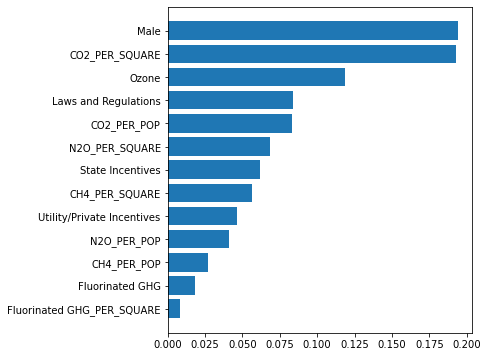

In [43]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data_q1_2.iloc[:,1:].columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
plt.show()

cancer

In [44]:
data_q1 = data[data['Question']=='Invasive cancer (all sites combined), incidence']

data_q1.isnull().sum()

data_q1[data_q1['StratificationCategory1']=='Gender'].isnull().sum()


cluster                       0
Fluorinated GHG               0
Laws and Regulations          0
State Incentives              0
Utility/Private Incentives    0
Ozone                         0
Question                      0
DataValue                     2
StratificationCategory1       0
Stratification1               0
REGION                        0
Region_Name                   0
CO2_PER_POP                   0
CO2_PER_SQUARE                0
CH4_PER_POP                   0
CH4_PER_SQUARE                0
N2O_PER_POP                   0
N2O_PER_SQUARE                0
Fluorinated GHG_PER_SQUARE    0
dtype: int64

In [45]:
data_q1_2 = data_q1[data_q1['StratificationCategory1']=='Gender']
data_q1_2.drop(['Question','StratificationCategory1'], axis=1, inplace=True)
data_q1_2.isnull().sum()

/opt/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


cluster                       0
Fluorinated GHG               0
Laws and Regulations          0
State Incentives              0
Utility/Private Incentives    0
Ozone                         0
DataValue                     2
Stratification1               0
REGION                        0
Region_Name                   0
CO2_PER_POP                   0
CO2_PER_SQUARE                0
CH4_PER_POP                   0
CH4_PER_SQUARE                0
N2O_PER_POP                   0
N2O_PER_SQUARE                0
Fluorinated GHG_PER_SQUARE    0
dtype: int64

In [46]:
data_q1_2 = data_q1_2.dropna(subset=['DataValue'])
data_q1_2.isnull().sum()

cluster                       0
Fluorinated GHG               0
Laws and Regulations          0
State Incentives              0
Utility/Private Incentives    0
Ozone                         0
DataValue                     0
Stratification1               0
REGION                        0
Region_Name                   0
CO2_PER_POP                   0
CO2_PER_SQUARE                0
CH4_PER_POP                   0
CH4_PER_SQUARE                0
N2O_PER_POP                   0
N2O_PER_SQUARE                0
Fluorinated GHG_PER_SQUARE    0
dtype: int64

In [47]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_q1_2['Stratification1'] = label_encoder.fit_transform(data_q1_2['Stratification1'])
data_q1_2.rename(columns={'Stratification1':'Male'}, inplace=True)

data_q1_2.drop(['cluster', 'REGION','Region_Name'], axis=1, inplace=True)

In [48]:

data_q1_2.isnull().sum()

data_q1_2 = data_q1_2.dropna(subset=['DataValue'])

cols = data_q1_2.columns.tolist()
cols = cols[5:] + cols[:5]
data_q1_2 = data_q1_2[cols]


In [49]:


X = pd.DataFrame(data_q1_2.loc[:,'Male':])
y = pd.DataFrame(data_q1_2['DataValue'])

y.head()


,DataValue
62,577.7
63,490.6
486,364.2
488,383.1
895,443.9


Linear regression

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

nmc = 100

#Linear Regression
linreg = LinearRegression()
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
CVInfo = cross_validate(linreg, X, y, cv=cvf,return_train_score=True)
print('---- linear regression ----')
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

---- linear regression ----
0.34251269171861737
-0.16254201375498886


Random Forest Regression


In [51]:
#Random Forest

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#  Note:  no need for scaling, back to simple parameters
# set up dictionary for grid search
param_grid={'max_features':[7],'max_depth':[25],'n_estimators':[50]}
# set up cross-validation shuffles
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
# set up search
grid_search=GridSearchCV(RandomForestRegressor(random_state=25),param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)

print('---- random forest ----')
print(results[['rank_test_score','mean_test_score','param_max_features','param_max_depth']])
print('---- optimal parameters ----')
print(grid_search.best_params_)
print('---- best accuracy ----')
print(grid_search.best_score_)


/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector 

/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector 

/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector 

/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector 

---- random forest ----
   rank_test_score  mean_test_score param_max_features param_max_depth
0                1         0.492305                  7              25
---- optimal parameters ----
{'max_depth': 25, 'max_features': 7, 'n_estimators': 50}
---- best accuracy ----
0.49230458102131325


Gradient Boosting Regression

In [54]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

/opt/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy on training set: 0.989
Accuracy on test set: 0.759


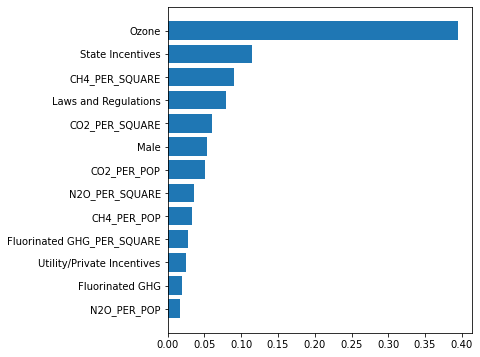

In [55]:

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data_q1_2.iloc[:,1:].columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
plt.show()